#### Customer Satisfaction Response to AI

Data was collected from India, China, and Canada in 2021 and 2022 by distributing online survey to online shoppers with exposure to AI tools. Dataset aims to analyze satisfied online shoppers based on their usage experience with AI tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer-Satisfaction-Responses.csv', encoding='ISO-8859-1')
df.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,YES,YES,Satisfied,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


In [3]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [4]:
duplicated = df.duplicated().sum()
print(f'There are {duplicated} duplicated rows in the dataset')

There are 8 duplicated rows in the dataset


In [5]:
df[df.duplicated()]

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
104,INDIA,YES,Millennials,Medium,Female,Masters Degree,YES,Metropolitan,NO,YES,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES
167,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
168,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
169,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
170,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
171,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
172,INDIA,NO,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,NO,YES,YES,Satisfied,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
652,CANADA,YES,Millennials,Medium High,Male,University Graduate,YES,Metropolitan,YES,YES,YES,YES,Satisfied,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()
df['AI_Satisfication'].describe()

count           648
unique            2
top       Satisfied
freq            529
Name: AI_Satisfication, dtype: object

In [9]:
df['AI_Satisfication'].value_counts() 

AI_Satisfication
Satisfied      529
Unsatisfied    119
Name: count, dtype: int64

In [10]:
df[df['AI_Satisfication'] == 'Satisfied'].value_counts()

Country  Online_Consumer  Age          Annual_Salary  Gender  Education            Payment_Method_Credit/Debit  Living_Region   Online_Service_Preference  AI_Endorsement  AI_Privacy_No_Trust   AI_Enhance_Experience  AI_Satisfication  AI_Tools_Used _Chatbots  AI_Tools_Used_Virtual_Assistant  AI_Tools_Used_Voice&Photo_Search  Payment_Method_COD  Payment_Method_Ewallet  Product_Category_Appliances  Product_Category_Electronics  Product_Category_Groceries  Product_Category_Personal_Care  Product_Category_Clothing
INDIA    YES              Millennials  Medium High    Male    University Graduate  YES                          Metropolitan    YES                        YES             YES                   YES                    Satisfied         YES                      YES                              YES                               YES                 YES                     NO                           YES                           NO                          NO                          

In [11]:
df.sample(5) # Randomly select 5 rows

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
275,CHINA,YES,Millennials,High,Female,University Graduate,NO,Metropolitan,YES,YES,YES,YES,Satisfied,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES
261,CHINA,YES,Gen X,High,Female,University Graduate,NO,Metropolitan,YES,YES,YES,YES,Satisfied,NO,NO,YES,NO,NO,YES,NO,YES,NO,YES
90,INDIA,YES,Millennials,Medium,Female,University Graduate,YES,Rural Areas,NO,YES,YES,NO,Unsatisfied,YES,YES,YES,NO,YES,NO,NO,NO,NO,YES
178,CHINA,YES,Millennials,High,Male,University Graduate,NO,Metropolitan,YES,YES,NO,YES,Satisfied,YES,YES,NO,NO,YES,YES,YES,YES,YES,YES
18,INDIA,YES,Gen Z,High,Female,University Graduate,YES,Metropolitan,YES,YES,YES,YES,Satisfied,NO,YES,YES,YES,NO,NO,YES,NO,YES,YES


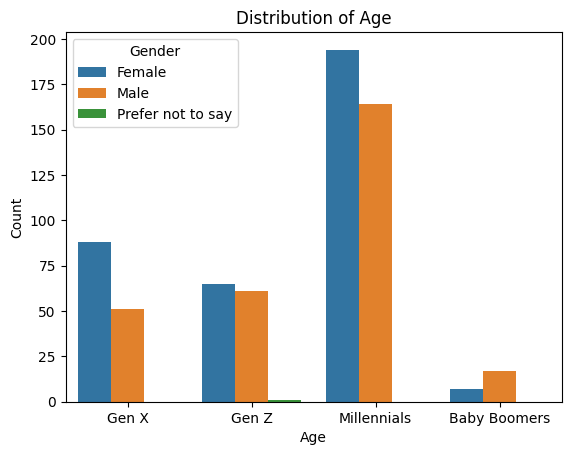

In [23]:
sns.countplot(data=df, x='Age', hue='Gender')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

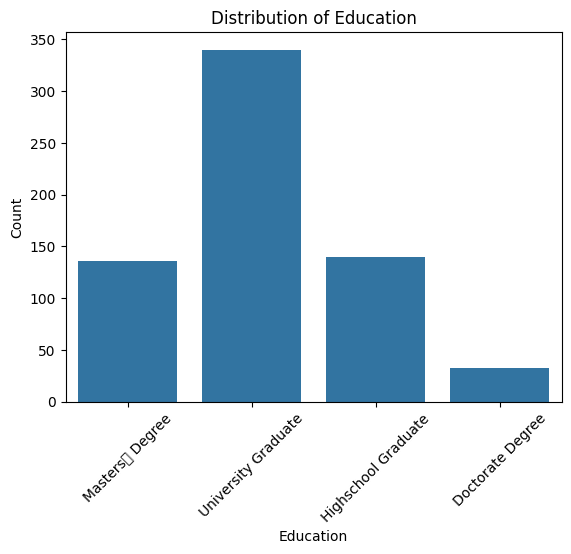

In [25]:
sns.countplot(data=df, x='Education')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.columns # Get the column names

Index(['Country', 'Online_Consumer', 'Age', 'Annual_Salary', 'Gender',
       'Education', 'Payment_Method_Credit/Debit', 'Living_Region',
       'Online_Service_Preference', 'AI_Endorsement', 'AI_Privacy_No_Trust ',
       'AI_Enhance_Experience', 'AI_Satisfication', 'AI_Tools_Used _Chatbots',
       'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search',
       'Payment_Method_COD', 'Payment_Method_Ewallet',
       'Product_Category_Appliances', 'Product_Category_Electronics',
       'Product_Category_Groceries', 'Product_Category_Personal_Care',
       'Product_Category_Clothing'],
      dtype='object')

In [15]:
df.info() # Get the data types of each column

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           648 non-null    object
 1   Online_Consumer                   648 non-null    object
 2   Age                               648 non-null    object
 3   Annual_Salary                     648 non-null    object
 4   Gender                            648 non-null    object
 5   Education                         648 non-null    object
 6   Payment_Method_Credit/Debit       648 non-null    object
 7   Living_Region                     648 non-null    object
 8   Online_Service_Preference         648 non-null    object
 9   AI_Endorsement                    648 non-null    object
 10  AI_Privacy_No_Trust               648 non-null    object
 11  AI_Enhance_Experience             648 non-null    object
 12  AI_Satisfication           

In [16]:
df.describe() # Get the summary statistics of the data

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfication,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
count,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648
unique,3,2,4,4,3,4,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,CHINA,YES,Millennials,High,Female,University Graduate,YES,Metropolitan,YES,YES,YES,YES,Satisfied,NO,NO,NO,NO,NO,YES,YES,NO,YES,YES
freq,252,633,358,224,354,340,423,430,478,552,467,549,529,352,352,399,454,399,329,432,366,341,478


In [17]:
df['Education'].value_counts() # Get the frequency of each unique value in the 'Education' column

Education
University Graduate    340
Highschool Graduate    140
Masters Degree        136
Doctorate Degree        32
Name: count, dtype: int64

<Axes: xlabel='Education'>

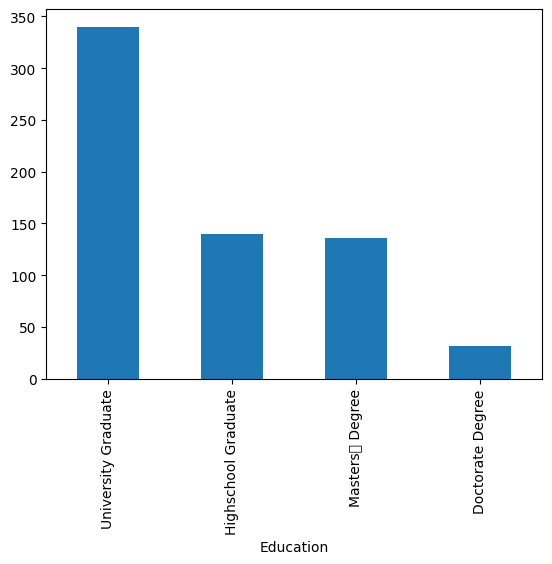

In [ ]:
df['Education'].value_counts().plot(kind='bar') # Plot the frequency of each unique value in the 'Education' column

In [18]:
df.isna().sum() # Get the number of missing values in each column

Country                             0
Online_Consumer                     0
Age                                 0
Annual_Salary                       0
Gender                              0
Education                           0
Payment_Method_Credit/Debit         0
Living_Region                       0
Online_Service_Preference           0
AI_Endorsement                      0
AI_Privacy_No_Trust                 0
AI_Enhance_Experience               0
AI_Satisfication                    0
AI_Tools_Used _Chatbots             0
AI_Tools_Used_Virtual_Assistant     0
AI_Tools_Used_Voice&Photo_Search    0
Payment_Method_COD                  0
Payment_Method_Ewallet              0
Product_Category_Appliances         0
Product_Category_Electronics        0
Product_Category_Groceries          0
Product_Category_Personal_Care      0
Product_Category_Clothing           0
dtype: int64

In [19]:
df.groupby('Education')['AI_Satisfication'].value_counts() # Get the frequency of each unique value in the 'AI_Satisfication' column for each unique value in the 'Education' column

Education            AI_Satisfication
Doctorate Degree     Satisfied            27
                     Unsatisfied           5
Highschool Graduate  Satisfied            94
                     Unsatisfied          46
Masters Degree      Satisfied           122
                     Unsatisfied          14
University Graduate  Satisfied           286
                     Unsatisfied          54
Name: count, dtype: int64

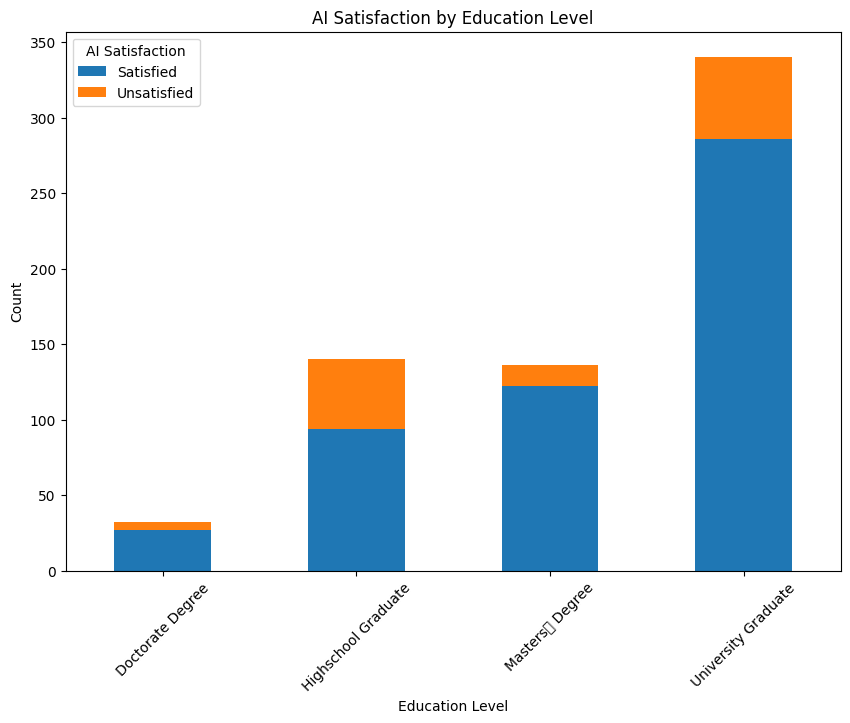

In [20]:
education_satisfaction = df.groupby('Education')['AI_Satisfication'].value_counts().unstack()
education_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('AI Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='AI Satisfaction')
plt.show()

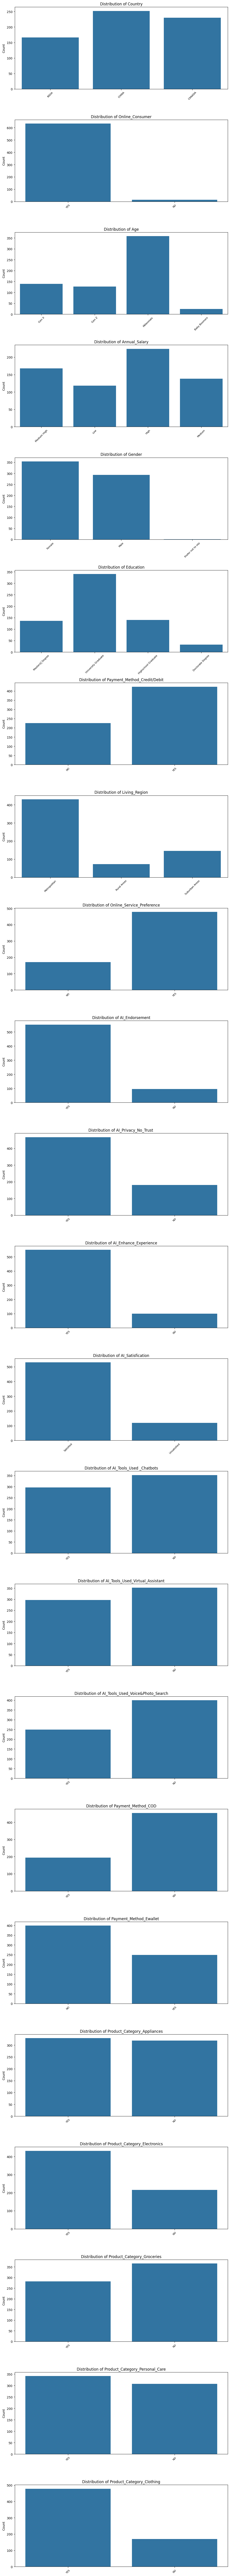

In [21]:
def analysis_graph(data):
    object_data_type = data.select_dtypes(include = ['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = max(len(object_data_type),len(numeric_data_type))
    plt.figure(figsize=(20, total_plots * 5))
    i = 0
    for idx,object_data in enumerate(object_data_type):
        i += 1
        plt.subplot(total_plots,2,idx*2+1)
        sns.countplot(data = data, x = object_data)
        plt.title(f"Distribution of {object_data}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation = 45, fontsize = 8)
    for idx,numeric_data in enumerate(numeric_data_type):
        i += 1
        plt.subplot(total_plots,2,idx*2+2)
        sns.histplot(data=data, x = numeric_data, kde = True)
        plt.title(f"Distribution of {numeric_data}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.xticks(fontsize = 8)
    plt.tight_layout()
    plt.show()

def analysis_bivariate_graph(data):
    object_data_type = data.select_dtypes(include = ['object']).columns.to_list()
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = len(object_data_type) * len(numeric_data_type)
    plt.figure(figsize=(20,total_plots*5))
    i = 0 
    for analysis in numeric_data_type:
        for hue in object_data_type:
            i += 1
            plt.subplot((total_plots//2) + (total_plots %2),2,i)
            sns.histplot(data=data, x = analysis, hue = hue, kde = False)
            plt.title(f"Distribution of {analysis} by {hue}", fontsize = 12)
            plt.xlabel("")
            plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def analysis_boxplot(data):
    numeric_data_type = data.select_dtypes(exclude = ['object']).columns.to_list()
    total_plots = len(numeric_data_type)
    plt.figure(figsize=(20,total_plots))
    i = 0 
    for analysis in numeric_data_type:
        i += 1
        plt.subplot((total_plots//2)+1,2,i)
        sns.boxplot(data=data, x = analysis)
        plt.title(f"Boxplot of {analysis}", fontsize = 12)
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()
    
def correlation_analysis(data):
    numeric_data_type = df.select_dtypes(exclude=['object']).columns.to_list()
    total_plots = len(numeric_data_type)**2
    plt.figure(figsize=(20,(total_plots//2)*4))
    i = 0
    for cor1 in numeric_data_type:
        for cor2 in numeric_data_type:
            i += 1
            plt.subplot((total_plots//2)+1,2,i)
            sns.scatterplot(data = data, x = cor1, y = cor2)
            plt.title(f"Correlation between {cor1} and {cor2}")
            plt.xlabel(cor1)
            plt.ylabel(cor2)
    plt.tight_layout()
    plt.show()
analysis_graph(df)
